## Final Project Submission

Please fill out:
* Student name: Sammy Kinyanjui Macharia
* Student pace: part time 
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [2]:
# Importing the packages used in this project

import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None

# Reading in the data
df = pd.read_csv('tn.movie_budgets.csv')


In [3]:
#Looking at the data
df.head()


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


# Data cleaning

In [5]:
# Checking if there are any duplicated data 

len(df)-len(df.drop_duplicates())

0

In [6]:
# Dropping all duplicates

df.drop_duplicates(inplace=True)

In [8]:
#checking misssing data
df.isna().sum()

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

In [9]:
# missing data in percent

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100, 1)))

id - 0.0%
release_date - 0.0%
movie - 0.0%
production_budget - 0.0%
domestic_gross - 0.0%
worldwide_gross - 0.0%


In [14]:
#checking data types(collumns)
df.dtypes

id                    int64
release_date         object
movie                object
production_budget    object
domestic_gross       object
worldwide_gross      object
dtype: object

In [26]:
#remove $ sign from the collumns
df.production_budget = df.production_budget.str.replace('$','')
df.domestic_gross = df.domestic_gross.str.replace('$','')
df.worldwide_gross = df.worldwide_gross.str.replace('$','')
df.production_budget = df.production_budget.str.replace(',','')
df.domestic_gross = df.domestic_gross.str.replace(',','')
df.worldwide_gross = df.worldwide_gross.str.replace(',','')
# Changing numeric data to integer format
df = df.astype({'production_budget': 'int64','domestic_gross': 'int64','worldwide_gross': 'int64', })

In [27]:
df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747


In [49]:
#spliting the year and month from the release date
df['year'] = df['release_date'].str[-5:].str.strip()
df['month'] = df['release_date'].str[:4].str.strip()
df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,year,month
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2009,Dec
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,2011,May
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,2019,Jun
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,2015,May
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,2017,Dec


In [50]:
#dropping the release_date collumn
df.drop(['release_date','id'], axis=1, inplace=True)
df.head()

,id,movie,production_budget,domestic_gross,worldwide_gross,year,month
0,1,Avatar,425000000,760507625,2776345279,2009,Dec
1,2,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,2011,May
2,3,Dark Phoenix,350000000,42762350,149762350,2019,Jun
3,4,Avengers: Age of Ultron,330600000,459005868,1403013963,2015,May
4,5,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,2017,Dec


In [51]:
#sorting data by the worldwide gross
df = df.sort_values(by=['worldwide_gross'], ascending=False)
df.head()

,id,movie,production_budget,domestic_gross,worldwide_gross,year,month
0,1,Avatar,425000000,760507625,2776345279,2009,Dec
42,43,Titanic,200000000,659363944,2208208395,1997,Dec
5,6,Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,2015,Dec
6,7,Avengers: Infinity War,300000000,678815482,2048134200,2018,Apr
33,34,Jurassic World,215000000,652270625,1648854864,2015,Jun


# Exploring data

In [53]:
# get details about production_budget and worldwide gross
df[['production_budget','worldwide_gross']].describe()

,production_budget,worldwide_gross
count,5.782000e+03,5.782000e+03
mean,3.158776e+07,9.148746e+07
std,4.181208e+07,1.747200e+08
min,1.100000e+03,0.000000e+00
25%,5.000000e+06,4.125415e+06
50%,1.700000e+07,2.798445e+07
75%,4.000000e+07,9.764584e+07
max,4.250000e+08,2.776345e+09


<Axes: title={'center': 'Wordwide gross based on  release year'}, xlabel='Worldwide Gross', ylabel='year'>

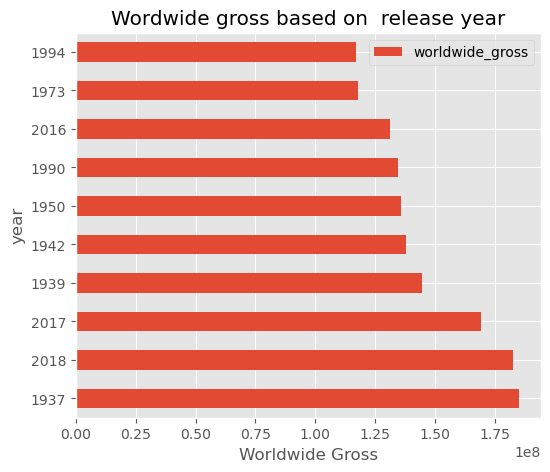

In [75]:
#Top 10 perfoming years(Average Worldwide gross)  
dfy = df.groupby(['year'])[['worldwide_gross']].mean().sort_values(['worldwide_gross'], ascending=False)[:10]
dfy.plot(kind = 'barh',title= 'Wordwide gross based on  release year',xlabel='Worldwide Gross',figsize=(6,5))

In [81]:
#movies produced in 1937
df.loc[df['year']=='1937']

,movie,production_budget,domestic_gross,worldwide_gross,year,month
5117,Snow White and the Seven Dwarfs,1488000,184925486,184925486,1937,Dec


<Axes: title={'center': 'Production budget based on  release year'}, xlabel='Production budget', ylabel='year'>

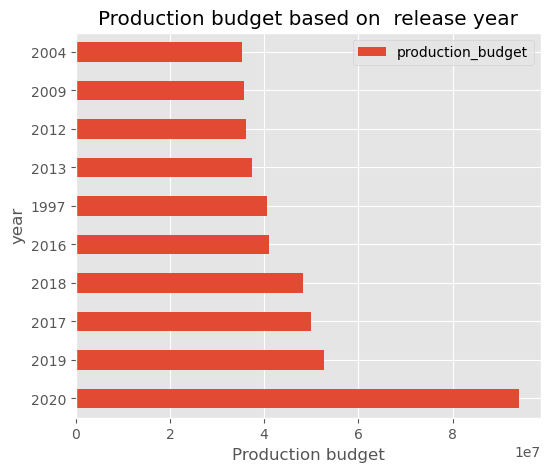

In [76]:
#Top 10 years average budget spent on movies  
dfb = df.groupby(['year'])[['production_budget']].mean().sort_values(['production_budget'], ascending=False)[:10]
dfb.plot(kind = 'barh',title= 'Production budget based on  release year',xlabel='Production budget',figsize=(6,5))

In [86]:
df.loc[df['year']=='2020']

,movie,production_budget,domestic_gross,worldwide_gross,year,month
1205,Hannibal the Conqueror,50000000,0,0,2020,Dec
194,Moonfall,150000000,0,0,2020,Dec
535,Call of the Wild,82000000,0,0,2020,Feb


<Axes: title={'center': 'Wordwide gross based on month release date'}, xlabel='Worldwide Gross', ylabel='month'>

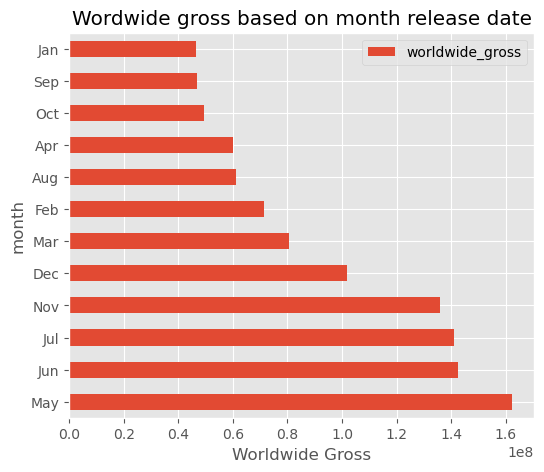

In [72]:
#Average perfomance of movies based on release month 
dfg = df.groupby(['month'])[['worldwide_gross']].mean().sort_values(['worldwide_gross'], ascending=False)
dfg.plot(kind = 'barh',title= 'Wordwide gross based on month release date',xlabel='Worldwide Gross',figsize=(6,5))

In [74]:
df.drop(['id'], axis=1, inplace=True)
df.head()

,movie,production_budget,domestic_gross,worldwide_gross,year,month
0,Avatar,425000000,760507625,2776345279,2009,Dec
42,Titanic,200000000,659363944,2208208395,1997,Dec
5,Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,2015,Dec
6,Avengers: Infinity War,300000000,678815482,2048134200,2018,Apr
33,Jurassic World,215000000,652270625,1648854864,2015,Jun


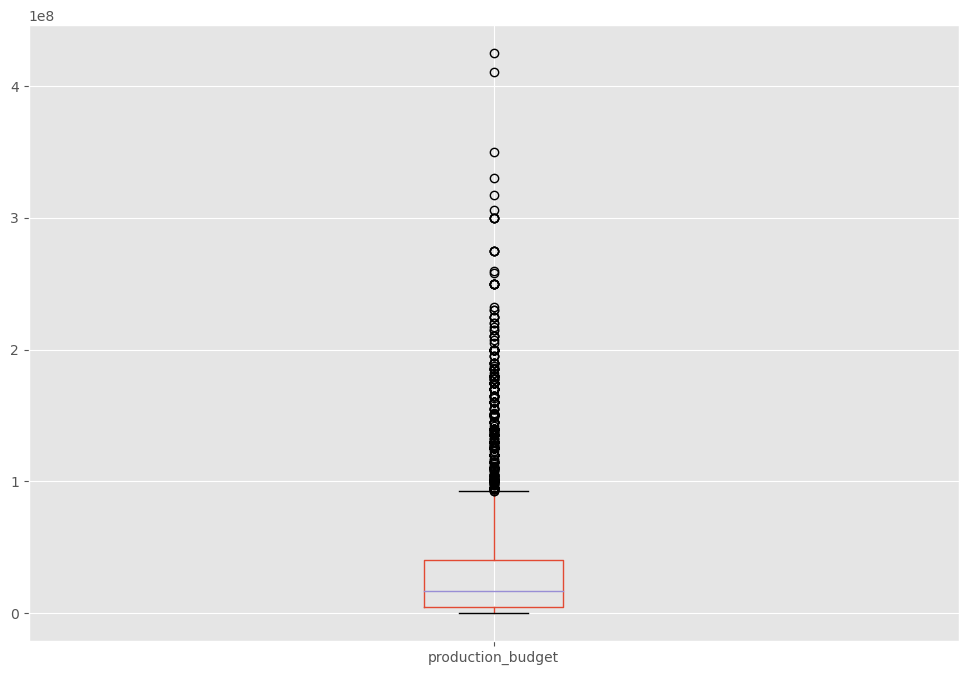

In [96]:
# Looking for outliers

df.boxplot(column=['production_budget'])
plt.show()

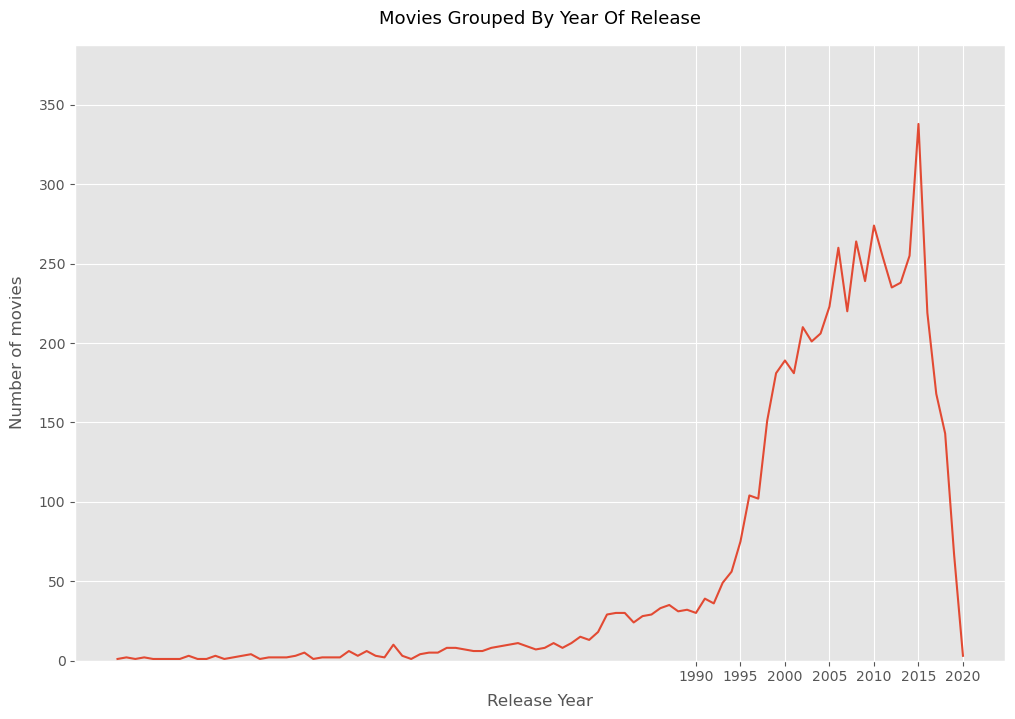

In [93]:
data = df['year'].value_counts().sort_index()

plt.plot(data.index, data.values)

plt.title('Movies Grouped By Year Of Release',y=1.02, fontsize=13)
plt.xlabel('Release Year', labelpad=7, fontsize=12)
plt.ylabel('Number of movies', labelpad=10, fontsize=12)

plt.ylim(0, max(data.values)+50)
plt.xticks(['1990','1995','2000','2005','2010','2015','2020'])
plt.show()

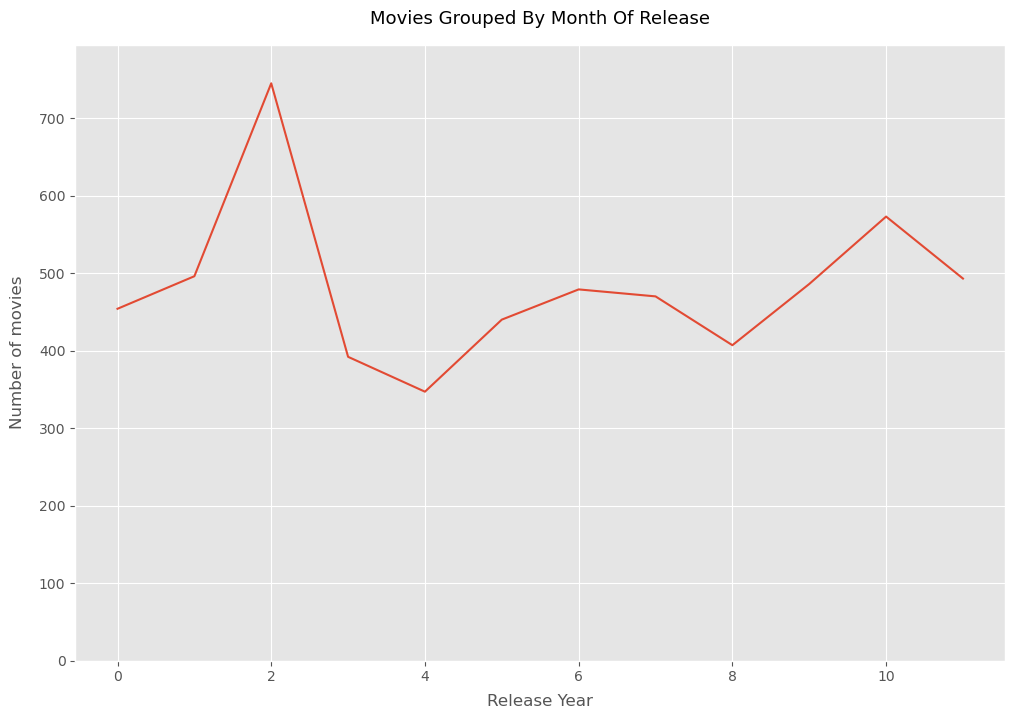

In [112]:
data = df['month'].value_counts().sort_index()

plt.plot(data.index, data.values)

plt.title('Movies Grouped By Month Of Release',y=1.02, fontsize=13)
plt.xlabel('Release Year', labelpad=7, fontsize=12)
plt.ylabel('Number of movies', labelpad=10, fontsize=12)

plt.ylim(0, max(data.values)+50)
#plt.xticks(['1990','1995','2000','2005','2010','2015','2020'])
plt.show()

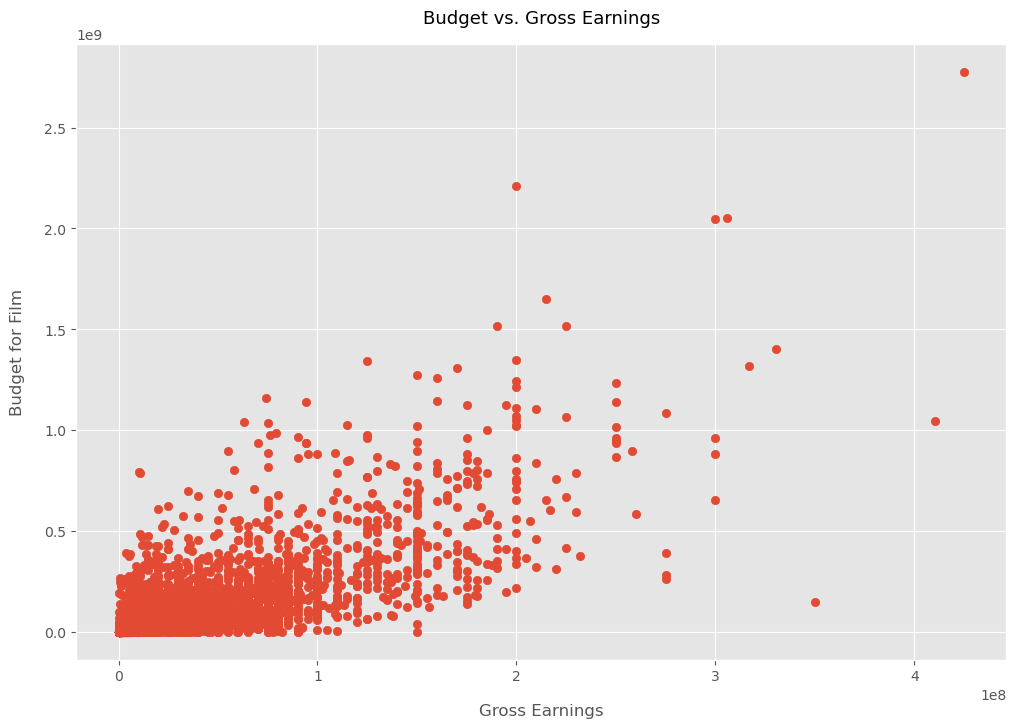

In [97]:
# Scatter plot with production budget vs worldwide gross

plt.scatter(x=df['production_budget'], y=df['worldwide_gross'])

plt.title('Budget vs. Gross Earnings', y=1.02, fontsize=13)

plt.xlabel('Gross Earnings', labelpad=14, fontsize=12)
plt.ylabel('Budget for Film', labelpad=14, fontsize=12)
plt.show()

In [99]:
df.head()

,movie,production_budget,domestic_gross,worldwide_gross,year,month
0,Avatar,425000000,760507625,2776345279,2009,Dec
42,Titanic,200000000,659363944,2208208395,1997,Dec
5,Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,2015,Dec
6,Avengers: Infinity War,300000000,678815482,2048134200,2018,Apr
33,Jurassic World,215000000,652270625,1648854864,2015,Jun


In [106]:
df.corr(numeric_only = True)


,production_budget,domestic_gross,worldwide_gross
production_budget,1.000000,0.685682,0.748306
domestic_gross,0.685682,1.000000,0.938853
worldwide_gross,0.748306,0.938853,1.000000


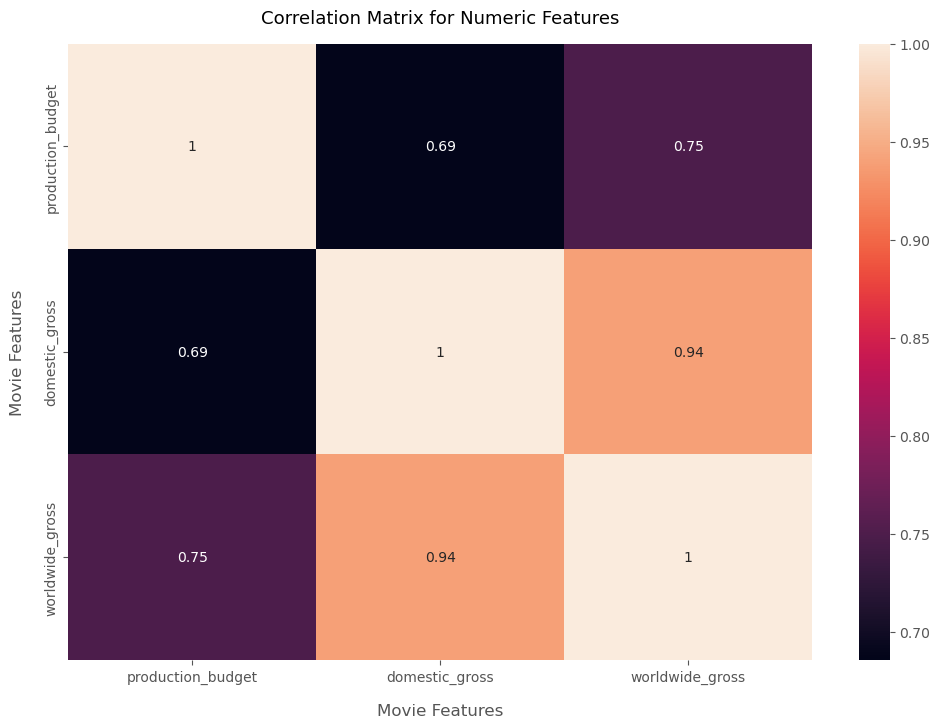

In [107]:
# High correlation between budget and gross

correlation_matrix = df.corr(numeric_only = True)

sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation Matrix for Numeric Features', y=1.02, fontsize=13)

plt.xlabel('Movie Features', labelpad=14, fontsize=12)
plt.ylabel('Movie Features', labelpad=14, fontsize=12)
plt.show()

In [108]:
# Unstacked correlation between numeric features

correlation_mat = df.corr(numeric_only = True)

corr_pairs = correlation_mat.unstack()

corr_pairs

production_budget  production_budget    1.000000
                   domestic_gross       0.685682
                   worldwide_gross      0.748306
domestic_gross     production_budget    0.685682
                   domestic_gross       1.000000
                   worldwide_gross      0.938853
worldwide_gross    production_budget    0.748306
                   domestic_gross       0.938853
                   worldwide_gross      1.000000
dtype: float64

C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 81.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 83.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 70.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 63.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 78.3% of the points

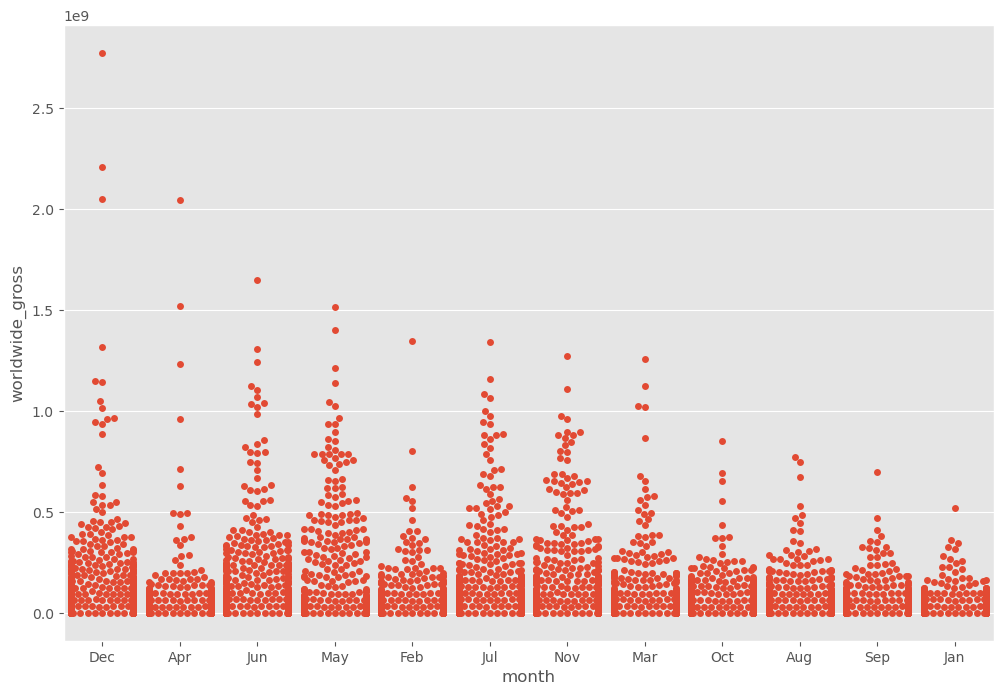

In [109]:
#Coorelation between month of movie release and Worldwide gross
sns.stripplot(x="month", y="worldwide_gross", data=df)

plt.show()

In [110]:
df_numerized = df


for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name]= df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes
        
df_numerized

,movie,production_budget,domestic_gross,worldwide_gross,year,month
0,438,425000000,760507625,2776345279,84,2
42,5230,200000000,659363944,2208208395,72,2
5,3933,306000000,936662225,2053311220,90,2
6,440,300000000,678815482,2048134200,93,0
33,2314,215000000,652270625,1648854864,90,6
...,...,...,...,...,...,...
5474,2175,500000,0,0,80,2
5473,1731,500000,0,0,87,5
5472,1383,500000,0,0,87,0
5471,1289,500000,0,0,85,2


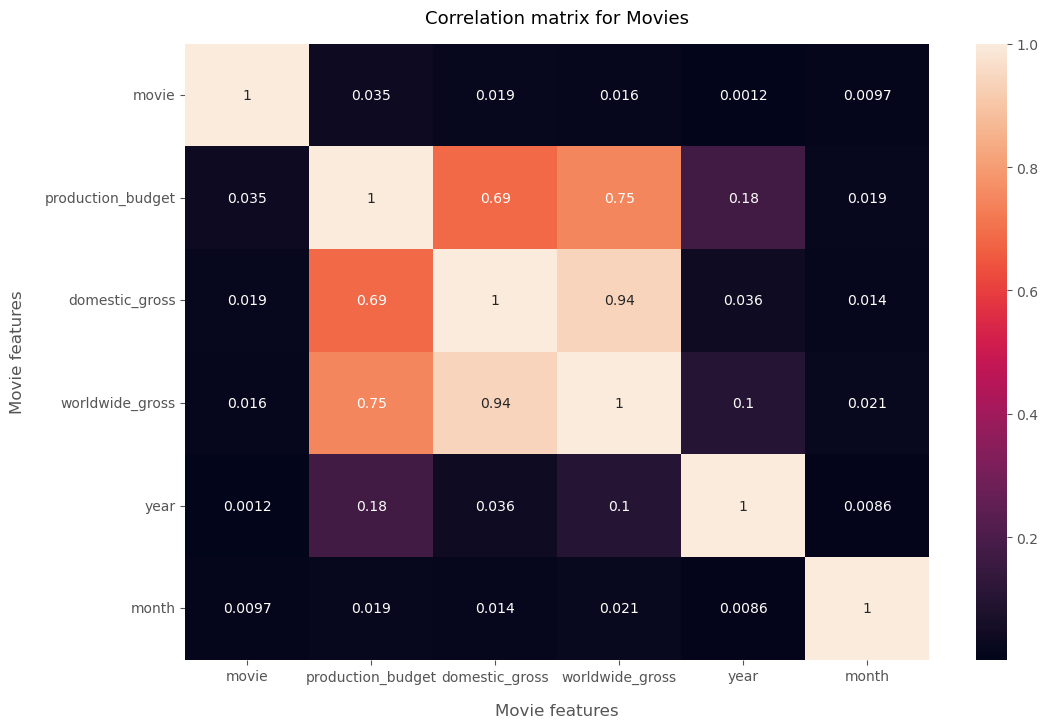

In [111]:
correlation_matrix = df_numerized.corr()

sns.heatmap(correlation_matrix, annot = True)

plt.title("Correlation matrix for Movies", y=1.02, fontsize=13)

plt.xlabel("Movie features", labelpad=14, fontsize=12)
plt.ylabel("Movie features", labelpad=14, fontsize=12)

plt.show()

In [55]:
#reading the second dataset
df2 = pd.read_csv('tmdb.csv')

In [34]:
df2.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,11/19/2010,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,3/26/2010,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,5/7/2010,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,11/22/1995,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,7/16/2010,Inception,8.3,22186


# Data Cleaning

In [35]:
# Checking if there are any duplicated data 

len(df2)-len(df2.drop_duplicates())

0

In [36]:
# Checking if there are any missing data
df2.isna().sum()

Unnamed: 0           0
genre_ids            0
id                   0
original_language    0
original_title       0
popularity           0
release_date         0
title                0
vote_average         0
vote_count           0
dtype: int64

In [56]:
df2.shape

(26517, 10)

In [58]:
df2.shape

(12859, 10)

In [14]:
df2.dtypes

Unnamed: 0             int64
genre_ids             object
id                     int64
original_language     object
original_title        object
popularity           float64
release_date          object
title                 object
vote_average         float64
vote_count             int64
dtype: object

In [66]:
df2.head()

,Unnamed: 0,genre_ids,id,original_language,popularity,title,vote_average,vote_count,year,month
0,0,"12, 14, 10751",12444,en,33.533,Harry Potter and the Deathly Hallows: Part 1,7.7,10788,2010,11
1,1,"14, 12, 16, 10751",10191,en,28.734,How to Train Your Dragon,7.7,7610,2010,3
2,2,"12, 28, 878",10138,en,28.515,Iron Man 2,6.8,12368,2010,5
3,3,"16, 35, 10751",862,en,28.005,Toy Story,7.9,10174,1995,11
4,4,"28, 878, 12",27205,en,27.920,Inception,8.3,22186,2010,7


In [57]:
#split release date to month and year column
df2['year'] = df2['release_date'].str[-4:].str.strip()
df2['month'] = df2['release_date'].str[:2].str.strip()
df2.month = df2.month.str.replace('/','')
#Remove special characters from the genre id column
df2.genre_ids = df2.genre_ids.str.replace('[','')
df2.genre_ids = df2.genre_ids.str.replace(']','')
df2.head()
#drop the release date and original title column
df2.drop(['release_date','original_title'], axis=1, inplace=True)
df2.head()
#drop rows that have vote count of less than 5
df2 = df2.drop(df2.loc[df2['vote_count']<=5].index)

In [11]:
df2.dtypes

Unnamed: 0             int64
genre_ids             object
id                     int64
original_language     object
popularity           float64
title                 object
vote_average         float64
vote_count             int64
year                  object
month                 object
dtype: object

In [59]:
# Changing columns data type

df2 = df2.astype({'year': 'int64','month': 'int64' })

# Exploring the Data

In [60]:
df2[['popularity', 'vote_average']].describe()

,popularity,vote_average
count,12859.000000,12859.000000
mean,5.495700,5.965246
std,5.274757,1.188820
min,0.600000,0.000000
25%,1.925000,5.200000
50%,3.787000,6.100000
75%,7.493000,6.800000
max,80.773000,10.000000


In [61]:
df2['vote_count'].describe()

count    12859.000000
mean       398.330119
std       1350.354994
min          6.000000
25%         12.000000
50%         30.000000
75%        135.500000
max      22186.000000
Name: vote_count, dtype: float64

<Axes: title={'center': 'Popularity of films'}, xlabel='Popularity', ylabel='original_language'>

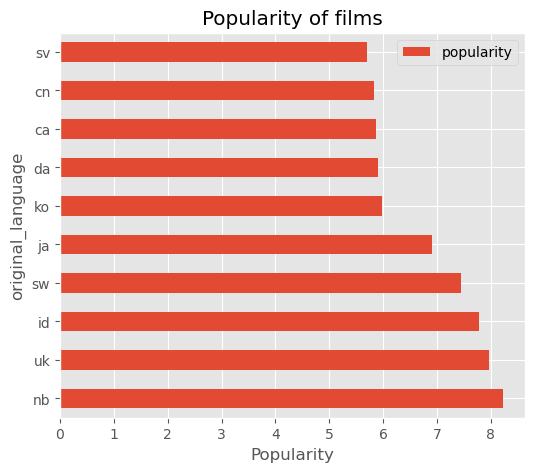

In [74]:
#Average popularity of films as per the original language(top 10 films)
dff = df2.groupby('original_language')[['popularity']].mean().sort_values('popularity', ascending=False)[:10]
dff.plot(kind = 'barh',title= 'Popularity of films',xlabel='Popularity',figsize=(6,5))



<Axes: title={'center': 'vote average for films'}, xlabel='Vote average', ylabel='original_language'>

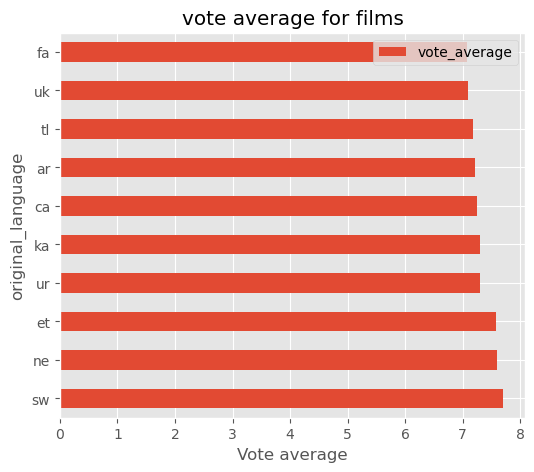

In [76]:
#top 10 vote average for films as per original language
dfl = df2.groupby('original_language')[['vote_average']].mean().sort_values('vote_average', ascending=False)[:10]
dfl.plot(kind = 'barh',title= 'vote average for films',xlabel='Vote average',figsize=(6,5))

In [77]:
#Finding the correlation between numeric variables
df2.corr(numeric_only = True)


,Unnamed: 0,id,popularity,vote_average,vote_count,year,month
Unnamed: 0,1.000000,0.907114,0.089454,0.081070,-0.011632,0.599037,-0.047068
id,0.907114,1.000000,-0.046761,0.043138,-0.118205,0.657047,0.020466
popularity,0.089454,-0.046761,1.000000,0.206692,0.710348,0.019086,0.074241
vote_average,0.081070,0.043138,0.206692,1.000000,0.204192,-0.011592,0.041922
vote_count,-0.011632,-0.118205,0.710348,0.204192,1.000000,-0.033221,0.069487
year,0.599037,0.657047,0.019086,-0.011592,-0.033221,1.000000,-0.038062
month,-0.047068,0.020466,0.074241,0.041922,0.069487,-0.038062,1.000000


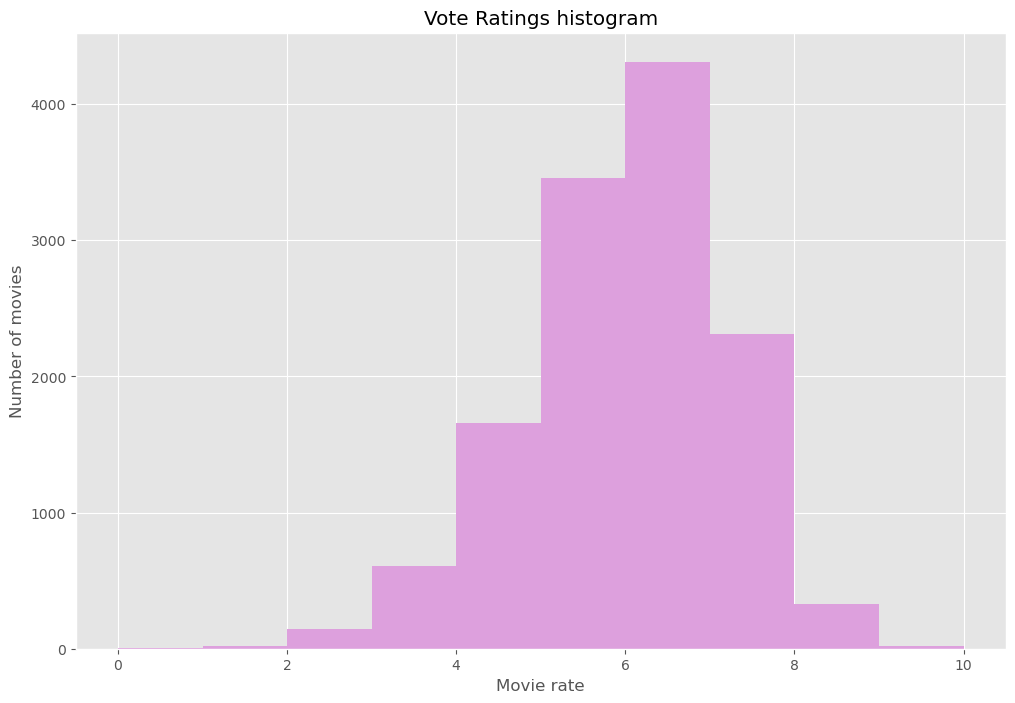

In [78]:
plt.hist(x=df2['vote_average'], bins=10, color='plum')
plt.xlabel('Movie rate')
plt.ylabel('Number of movies')
plt.title("Vote Ratings histogram")
plt.show()

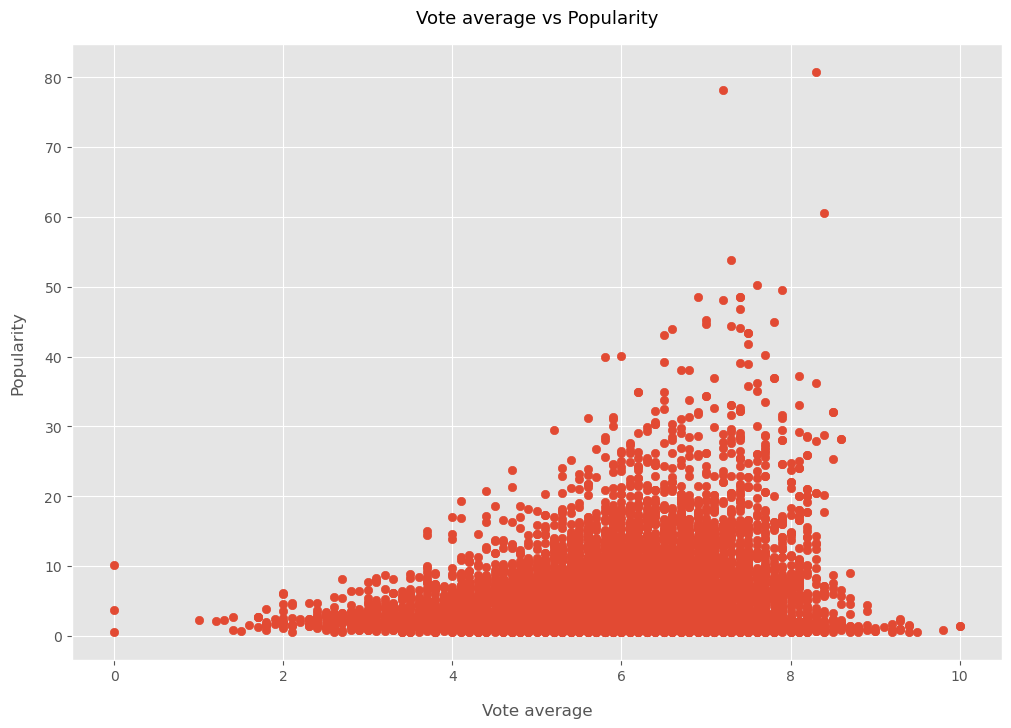

In [81]:
# Scatter plot with Vote average vs Popularity

plt.scatter(x=df2['vote_average'], y=df2['popularity'])

plt.title('Vote average vs Popularity', y=1.02, fontsize=13)

plt.xlabel('Vote average', labelpad=14, fontsize=12)
plt.ylabel('Popularity', labelpad=14, fontsize=12)
plt.show()

In [82]:
df2.head()

,Unnamed: 0,genre_ids,id,original_language,popularity,title,vote_average,vote_count,year,month
0,0,"12, 14, 10751",12444,en,33.533,Harry Potter and the Deathly Hallows: Part 1,7.7,10788,2010,11
1,1,"14, 12, 16, 10751",10191,en,28.734,How to Train Your Dragon,7.7,7610,2010,3
2,2,"12, 28, 878",10138,en,28.515,Iron Man 2,6.8,12368,2010,5
3,3,"16, 35, 10751",862,en,28.005,Toy Story,7.9,10174,1995,11
4,4,"28, 878, 12",27205,en,27.920,Inception,8.3,22186,2010,7


In [83]:
#Preprocessing the genre_ids collumn
#splitting a column to a list
df2["genre_ids"] = df2["genre_ids"].str.split(",") 
df2

,Unnamed: 0,genre_ids,id,original_language,popularity,title,vote_average,vote_count,year,month
0,0,"[12, 14, 10751]",12444,en,33.533,Harry Potter and the Deathly Hallows: Part 1,7.7,10788,2010,11
1,1,"[14, 12, 16, 10751]",10191,en,28.734,How to Train Your Dragon,7.7,7610,2010,3
2,2,"[12, 28, 878]",10138,en,28.515,Iron Man 2,6.8,12368,2010,5
3,3,"[16, 35, 10751]",862,en,28.005,Toy Story,7.9,10174,1995,11
4,4,"[28, 878, 12]",27205,en,27.920,Inception,8.3,22186,2010,7
...,...,...,...,...,...,...,...,...,...,...
26122,26122,[99],492184,en,0.695,Ladies First,8.2,9,2017,7
26140,26140,"[28, 80, 18]",510819,en,0.673,Dirty Dead Con Men,4.1,19,2018,3
26181,26181,"[878, 28]",571937,en,0.622,Vader: Episode 1 - Shards of the Past,8.5,6,2018,12
26438,26438,"[878, 18]",347030,en,0.600,Native,5.2,7,2018,6


In [84]:
#Convert the genre_ids column with a list-type value to multiple rows
df2 = df2.explode("genre_ids") 
df2

,Unnamed: 0,genre_ids,id,original_language,popularity,title,vote_average,vote_count,year,month
0,0,12,12444,en,33.533,Harry Potter and the Deathly Hallows: Part 1,7.7,10788,2010,11
0,0,14,12444,en,33.533,Harry Potter and the Deathly Hallows: Part 1,7.7,10788,2010,11
0,0,10751,12444,en,33.533,Harry Potter and the Deathly Hallows: Part 1,7.7,10788,2010,11
1,1,14,10191,en,28.734,How to Train Your Dragon,7.7,7610,2010,3
1,1,12,10191,en,28.734,How to Train Your Dragon,7.7,7610,2010,3
...,...,...,...,...,...,...,...,...,...,...
26181,26181,878,571937,en,0.622,Vader: Episode 1 - Shards of the Past,8.5,6,2018,12
26181,26181,28,571937,en,0.622,Vader: Episode 1 - Shards of the Past,8.5,6,2018,12
26438,26438,878,347030,en,0.600,Native,5.2,7,2018,6
26438,26438,18,347030,en,0.600,Native,5.2,7,2018,6


In [93]:
#remove any white spaces
df2['genre_ids'] = df2['genre_ids'].apply(lambda x: x.strip())


array(['12', '14', '10751', '16', '28', '878', '35', '53', '27', '80',
       '18', '10749', '10402', '9648', '36', '37', '10770', '10752', '99',
       ''], dtype=object)

<Axes: title={'center': 'vote average for films as per genre'}, xlabel='Vote average', ylabel='genre_ids'>

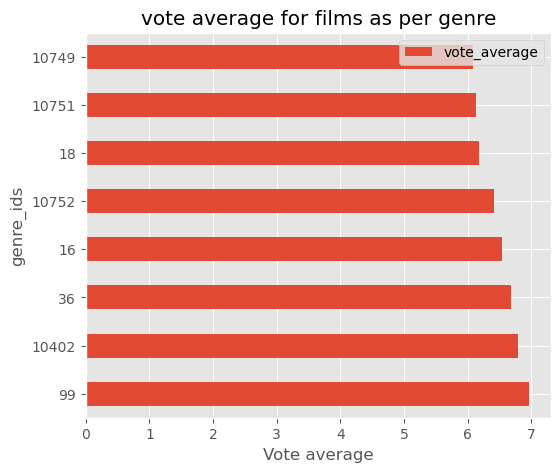

In [97]:
#top 10 vote average for films as per genre
dfgn = df2.groupby('genre_ids')[['vote_average']].mean().sort_values('vote_average', ascending=False)[:8]
dfgn.plot(kind = 'barh',title= 'vote average for films as per genre',xlabel='Vote average',figsize=(6,5))